### K-Means
- 군집화에서 가장 일반적인 알고리즘
- 군집 중심이라는 임의의 지점을 선택해서 해당 중심에 가장 가까운 포인트들을 선택하는 군집화
- 일반적인 군집화 에서 가장 많이 사용되는 기법
- 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 떨어짐

### Iris data

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris=load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
#컬럼의 cm 부분 없애고싶다
cols=[each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [5]:
#iris 데이터 정리
iris_df=pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#편의상 두개의 특성만
feature=iris_df[['petal length','petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
#군집화 시작
model=KMeans(n_clusters=3)
model.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
#결과 라벨
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
#군집 중심값
model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [10]:
#다시 정리-그림 그리기 위해
predict=pd.DataFrame(model.predict(feature),columns=['cluster'])
feature=pd.concat([feature,predict],axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


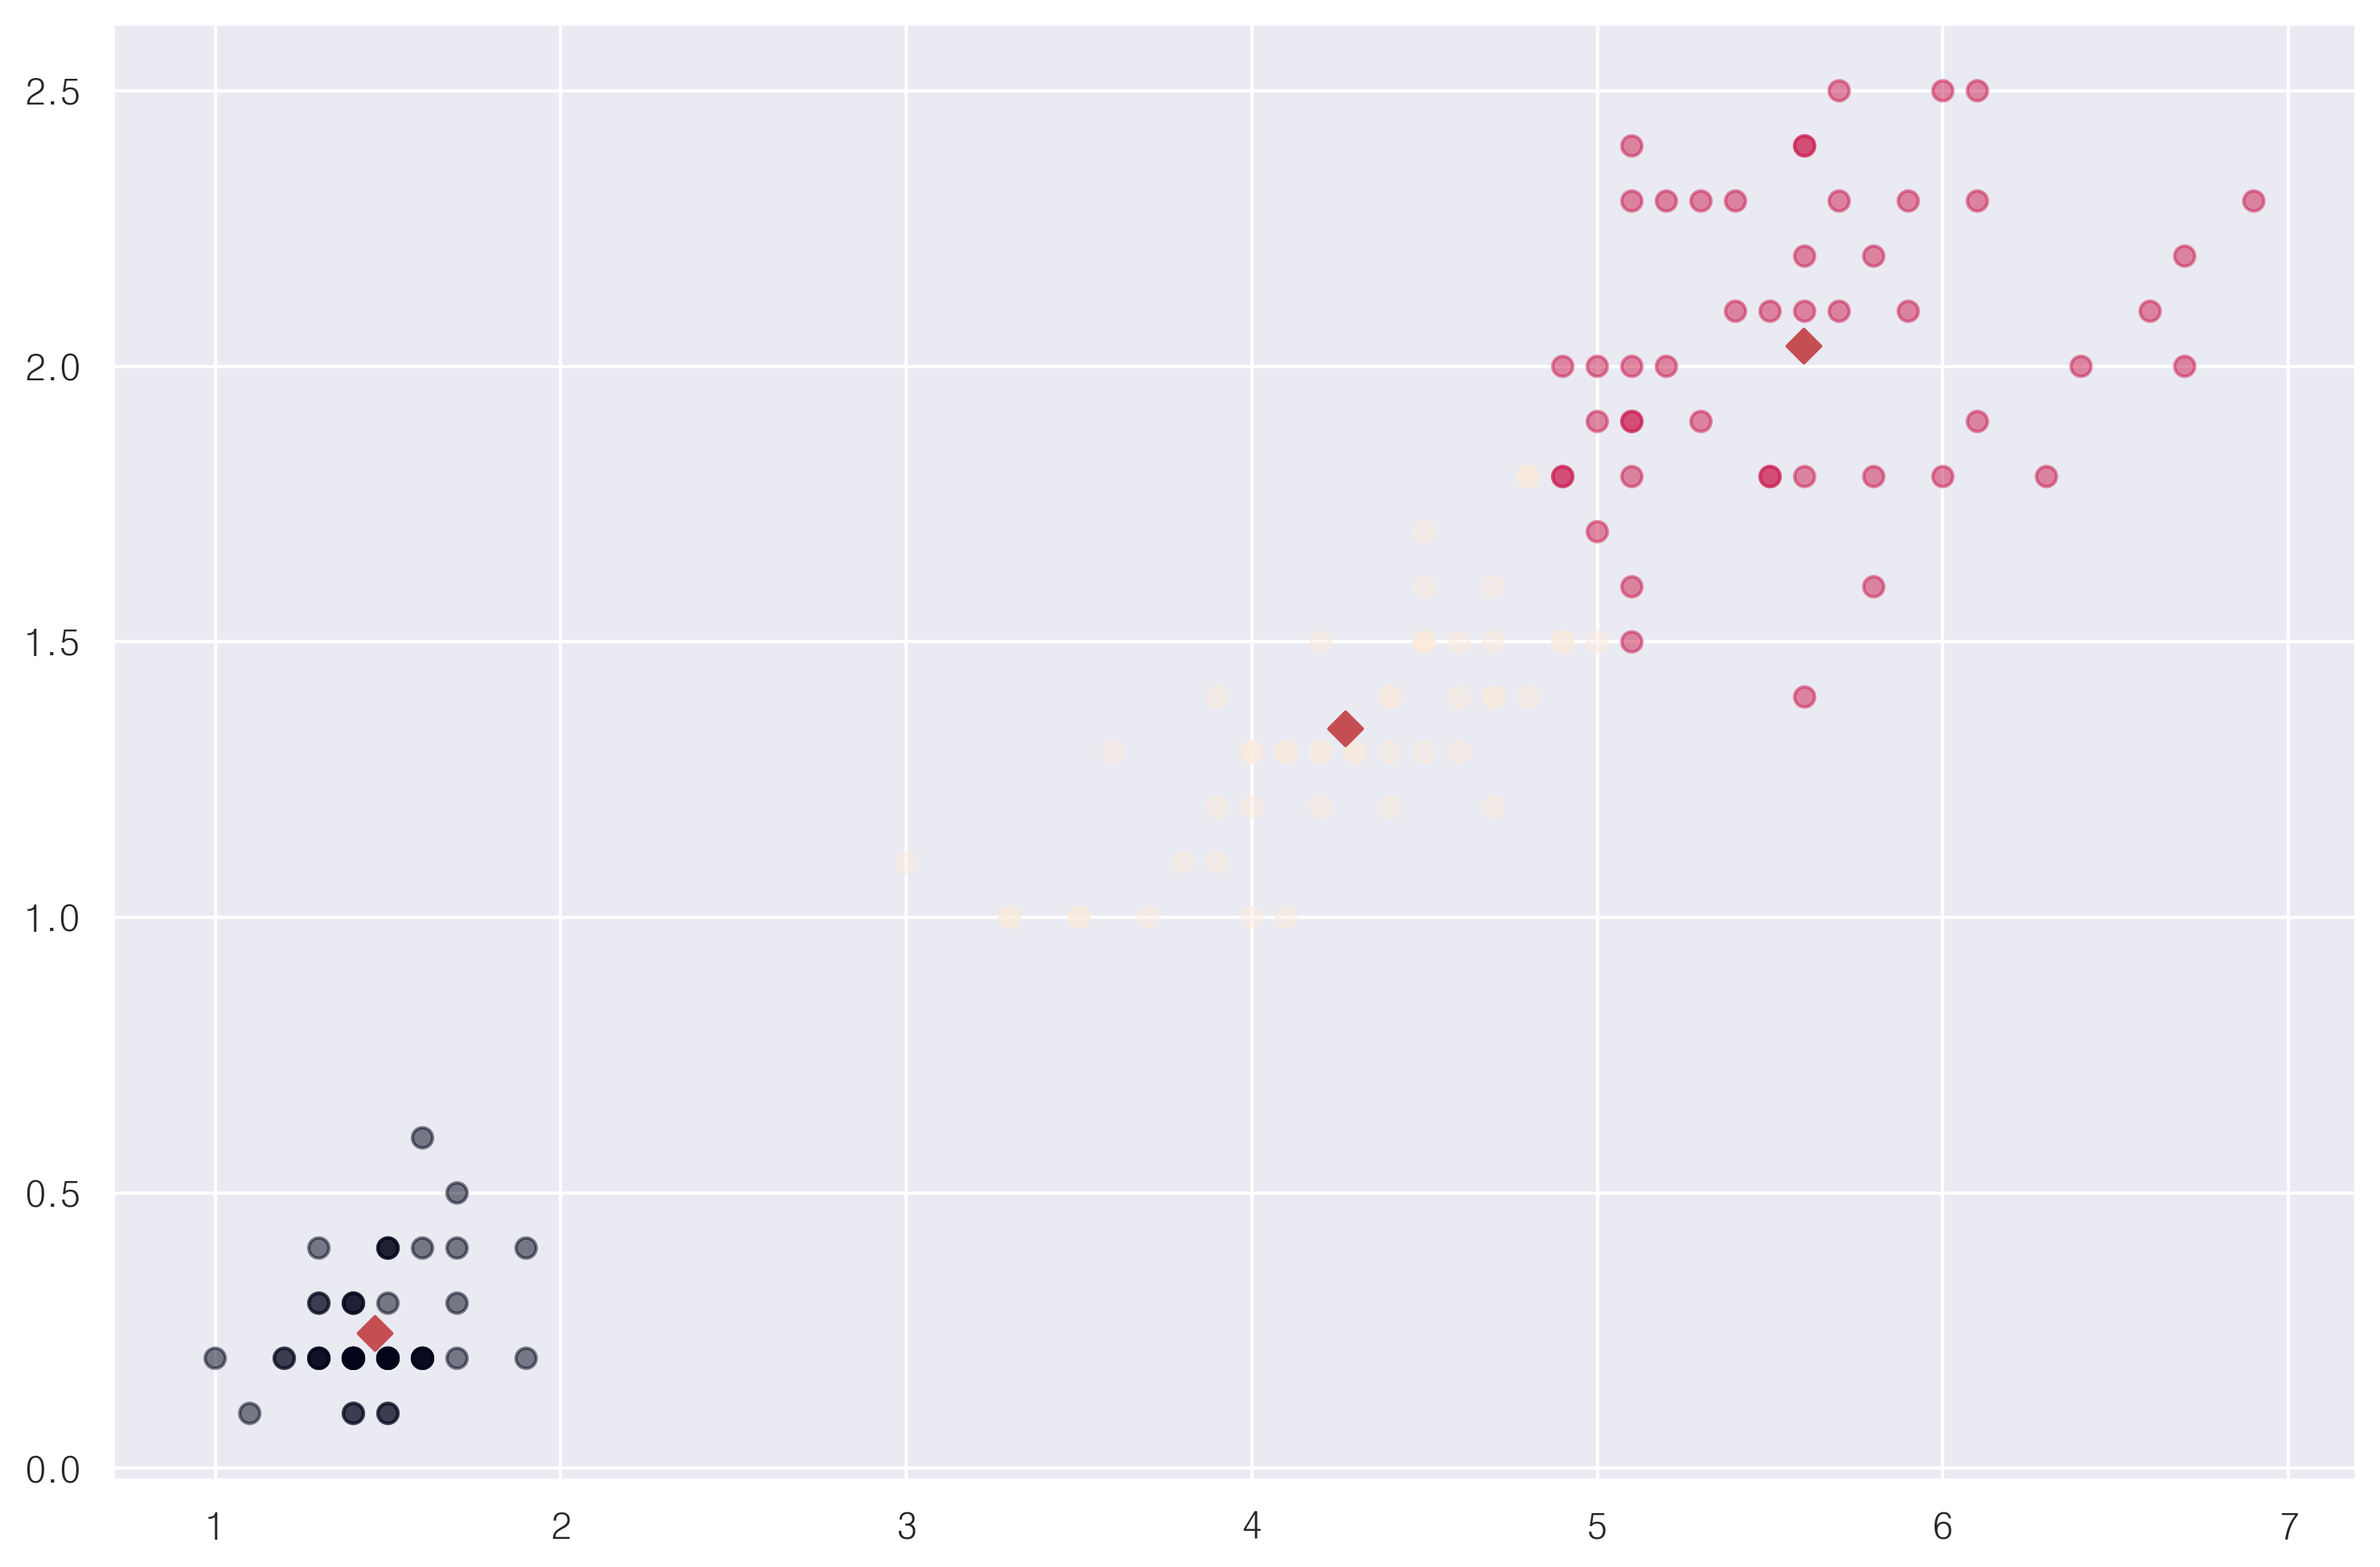

In [11]:
#결과를 확인하기 위해
centers=pd.DataFrame(model.cluster_centers_, columns=['petal length','petal width'])
center_x=centers['petal length']
center_y=centers['petal width']

plt.figure(figsize=(12,8))
plt.scatter(feature['petal length'], feature['petal width'], c=feature['cluster'], alpha=0.5)
plt.scatter(center_x, center_y, s=50, marker='D',c='r')
plt.show()


### 군집 평가
- 분류기는 평가 기준(정답)을 가지고 있지만, 군집은 그렇지 않다.
- 군집 결과를 평가하기 위해 실루엣 분석을 많이 활용한다
- 실루엣 분석
    - 실루엣 분석은 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냄
    - 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있는지 확인
    - 군집화가 잘 되어 있을 수록 개별 군집은 비슷한 정도의 여유공간을 가지고 있음
    - 실루엣 계수 : 개별 데이터가 가지는 군집화 지표
    - 칼처럼 생긴게 가장 좋음. 칼날의 끝점이 서로 구분되어 있으면 좋음
    - score : 낮을수록 좋다 
    - value : 1에 가까울 수록 좋다

In [16]:
#데이터 읽기
iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']
iris_df=pd.DataFrame(data=iris.data, columns=feature_names)
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=13).fit(iris_df)

In [18]:
#군집결과 정리하기
iris_df['cluster']=kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
#군집 결과 평가를 위한 작업 
from sklearn.metrics import silhouette_samples,silhouette_score
avg_value=silhouette_score(iris.data, iris_df['cluster'])
score_values=silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value',avg_value)
print('silhouette_samples() return 값의 shape',score_values.shape)

avg_value 0.5528190123564091
silhouette_samples() return 값의 shape (150,)


In [22]:
#https://github.com/nltk/nltk/issues/2357

def visualize_silhouette(cluster_lists, X_features): 
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import numpy as np
    import math
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

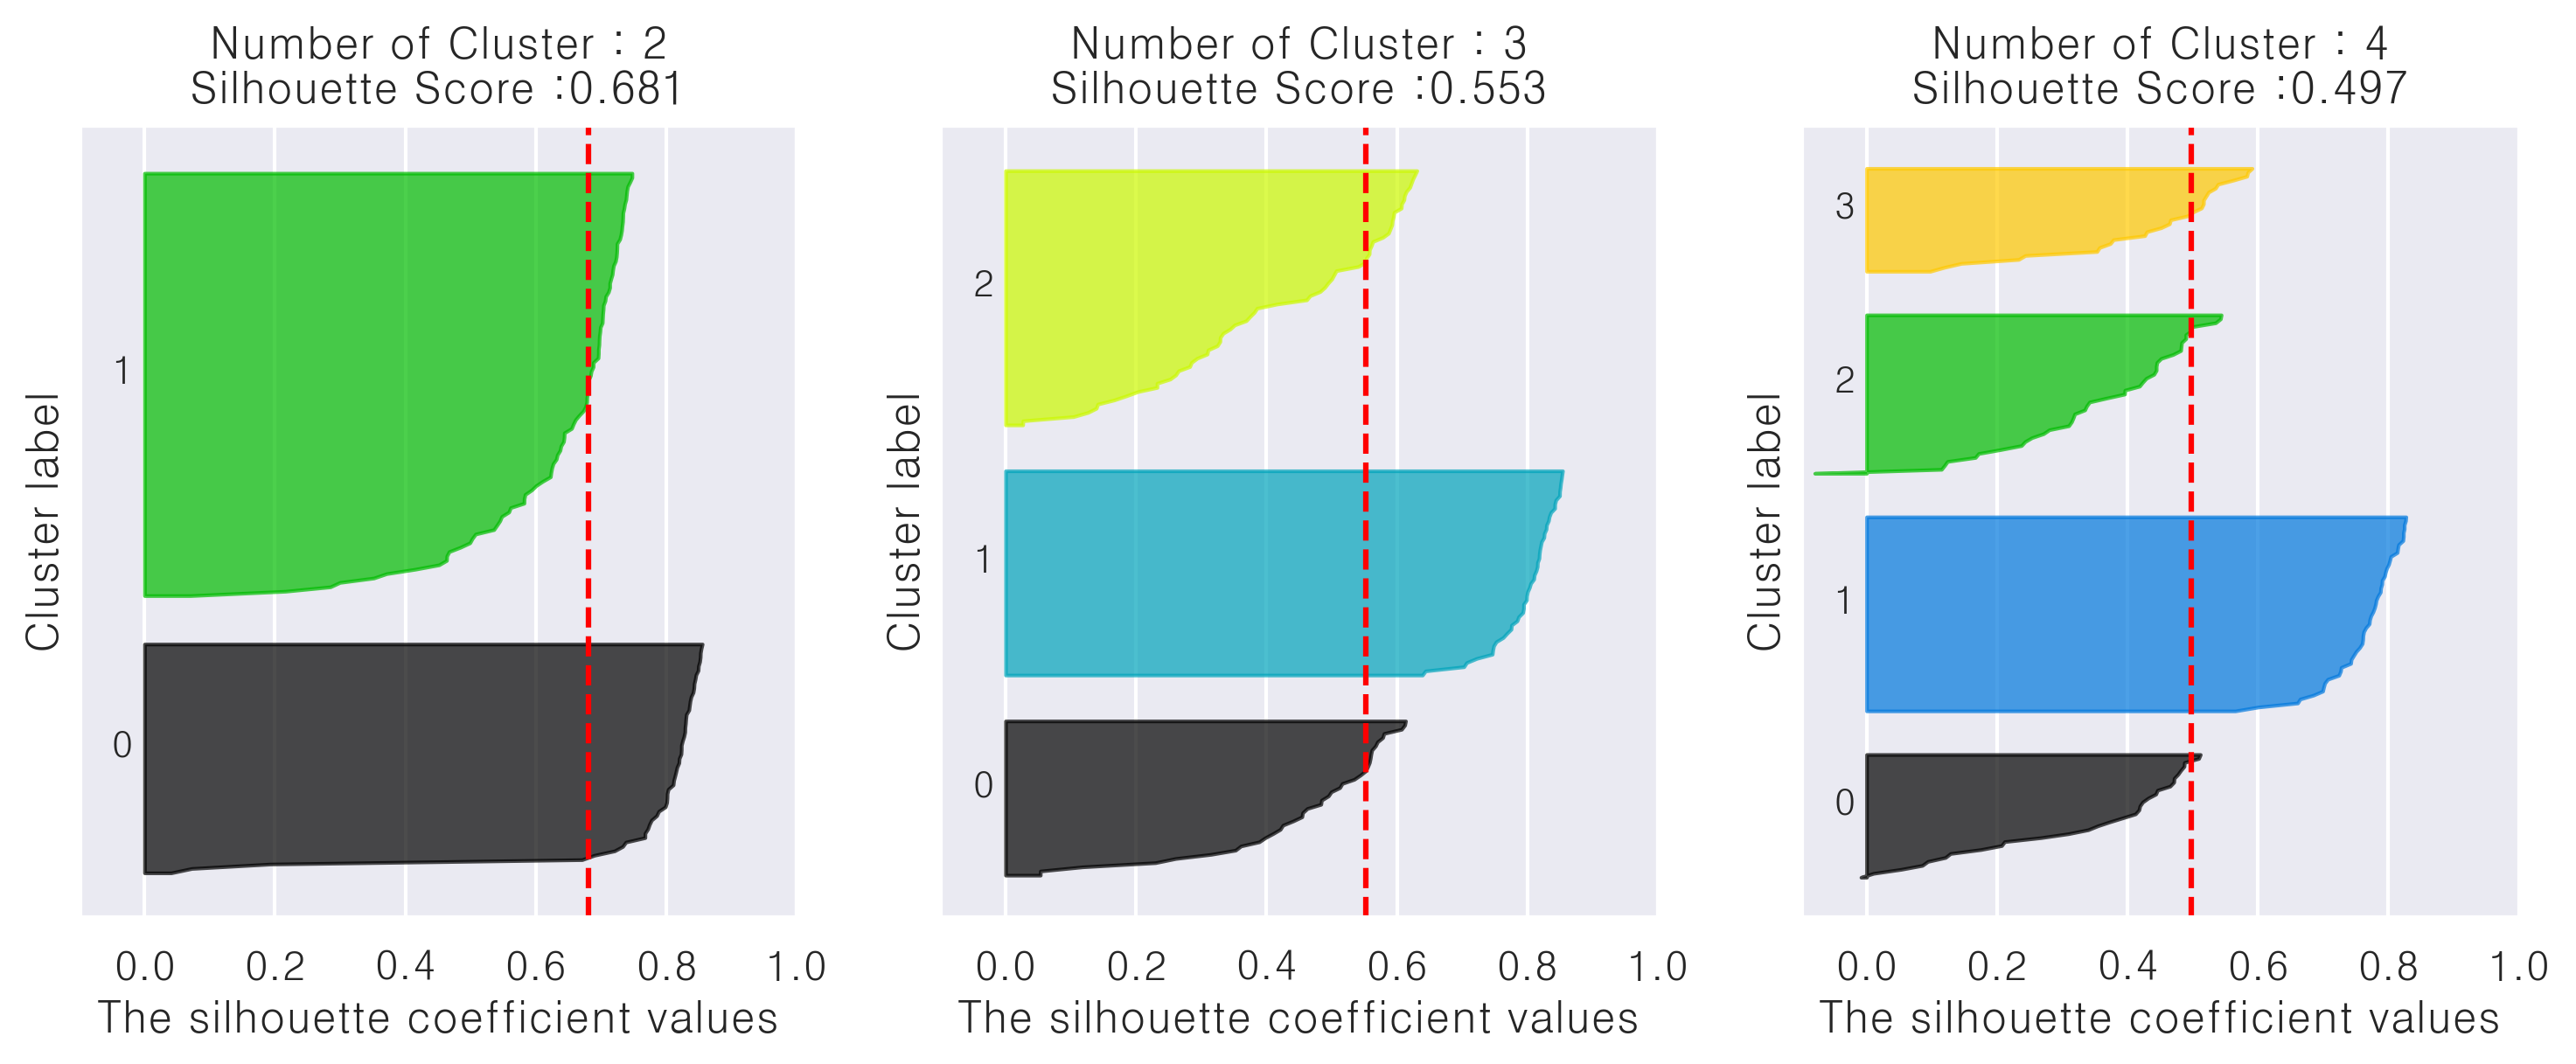

In [23]:
visualize_silhouette([2,3,4],iris.data)

### Mall Customer Segmentation

In [26]:
#데이터 읽기
dataset=pd.read_csv('./Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
#5개의 군집으로
from sklearn.cluster import KMeans
X=dataset.iloc[:,[3,4]].values
model=KMeans(n_clusters =5, init='k-means++',random_state=13)
cluster=model.fit_predict(X)

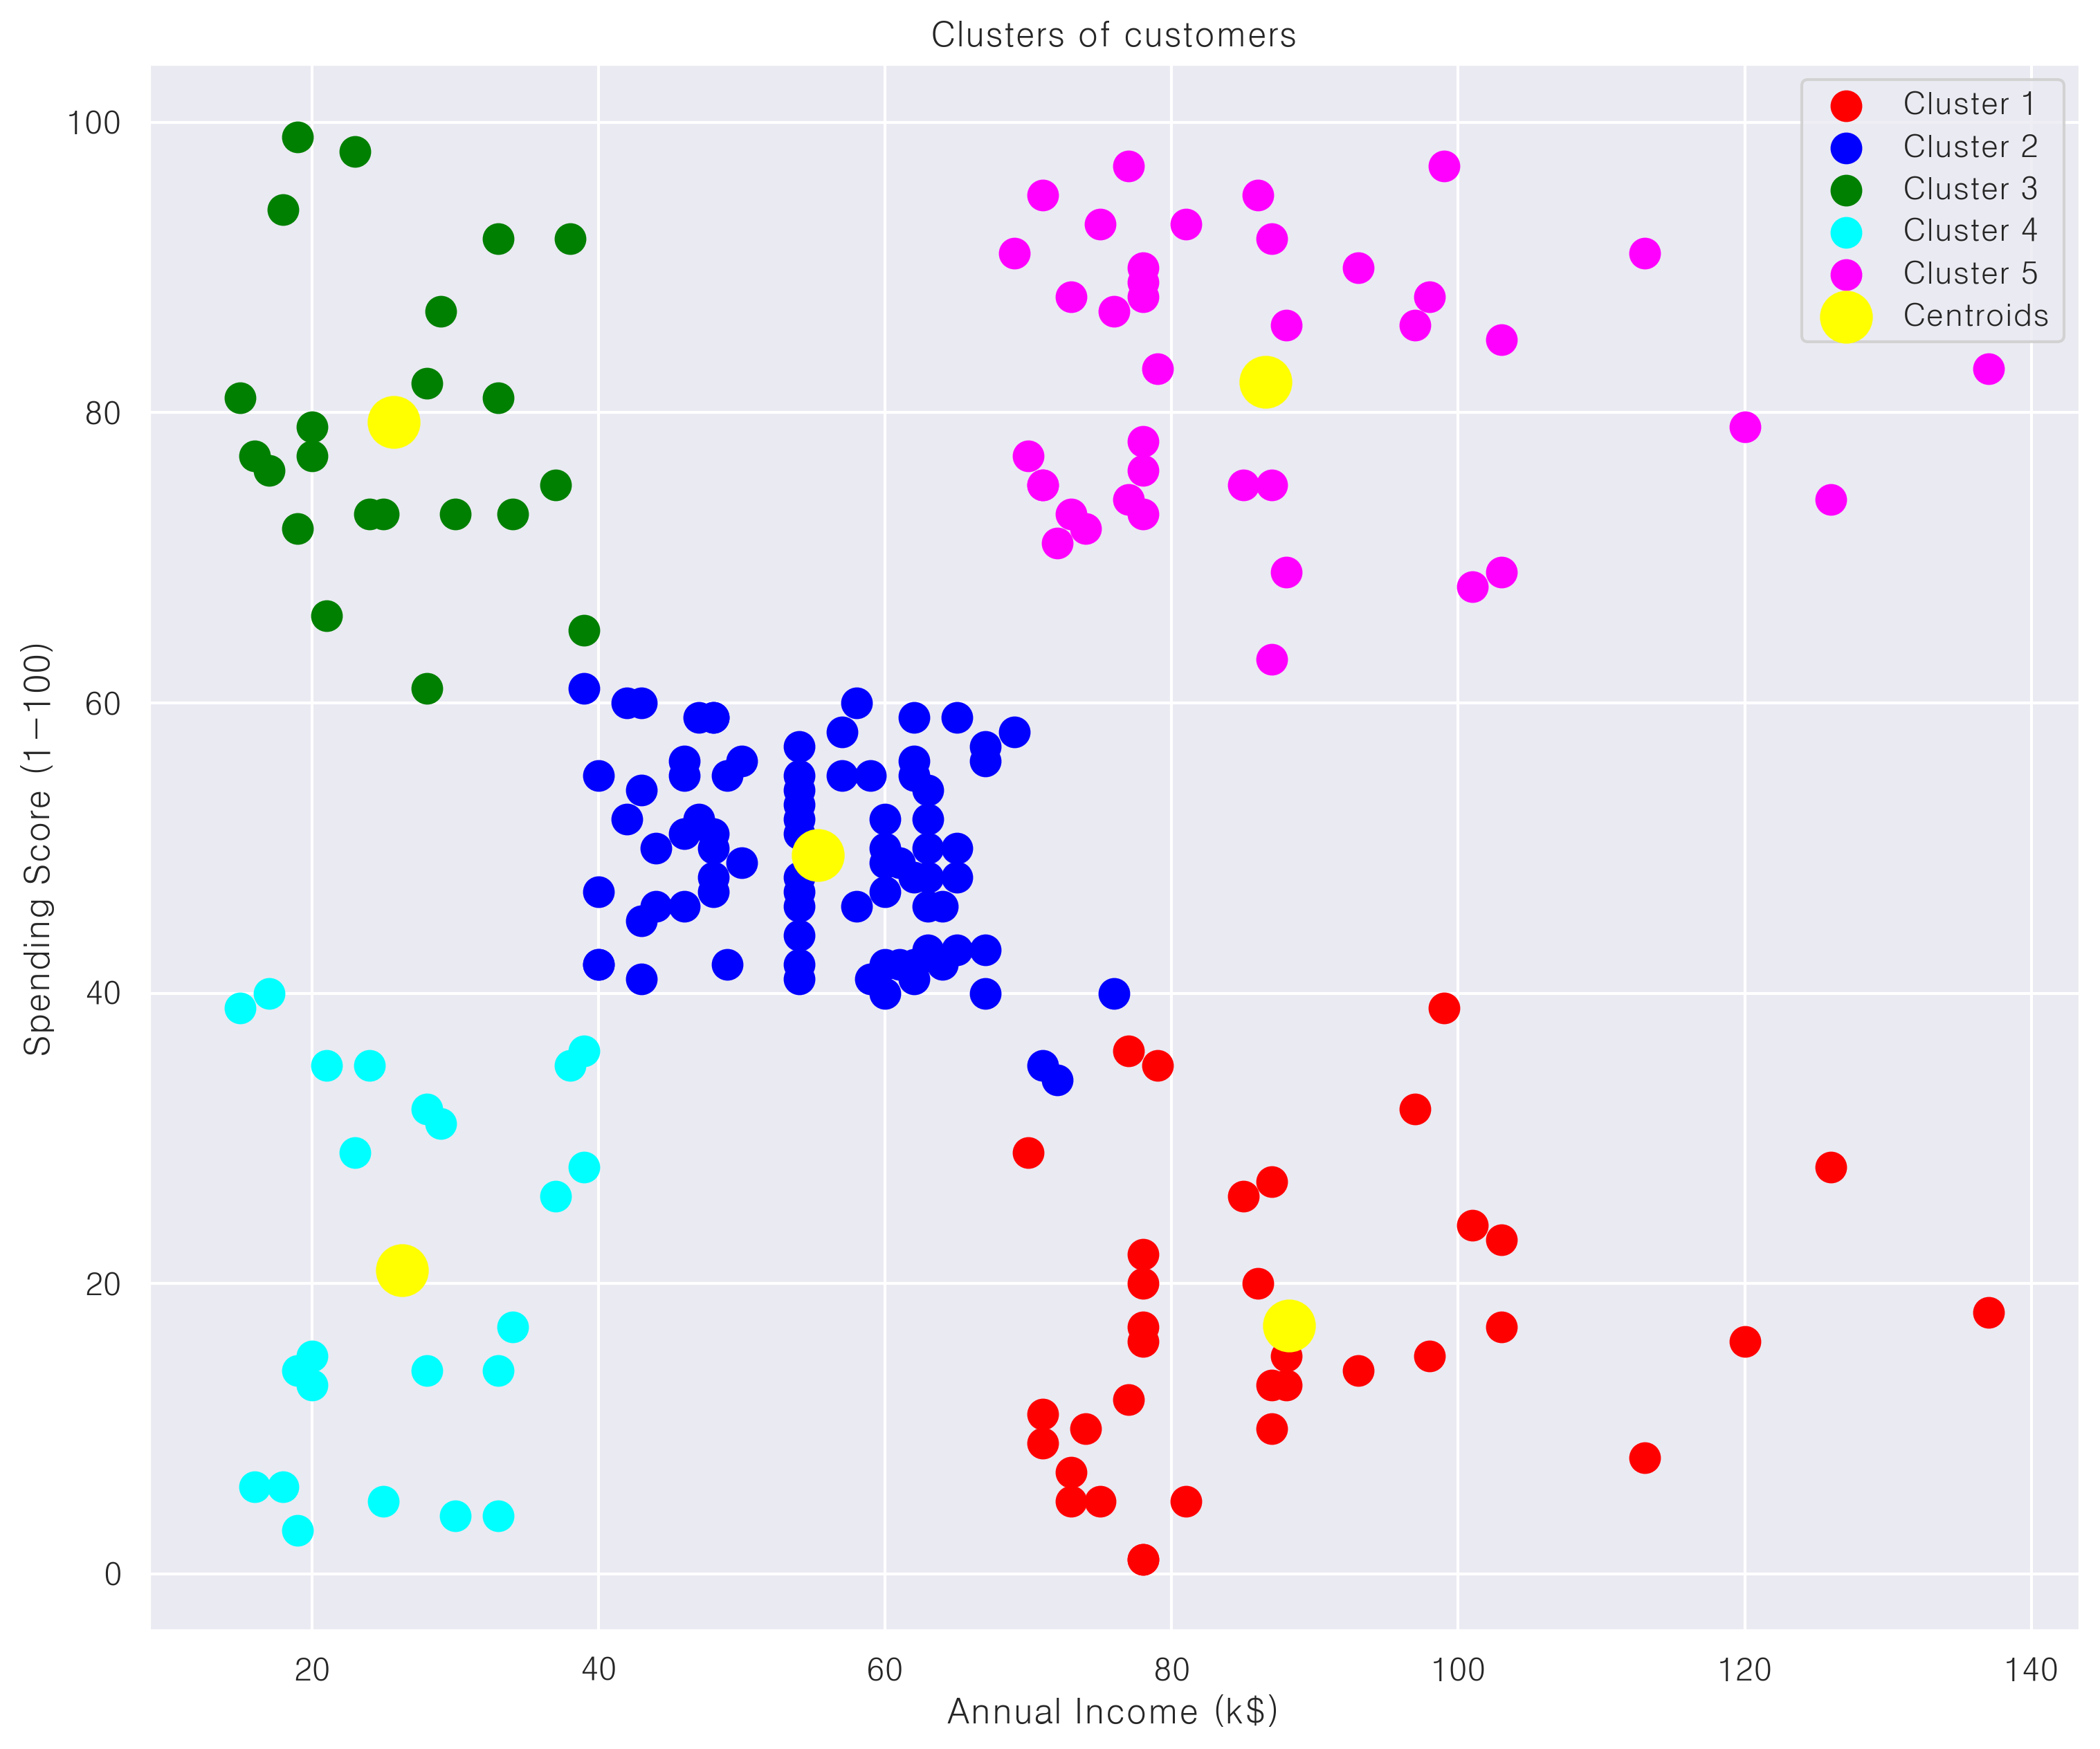

In [31]:
#그려보기
plt.figure(figsize=(12,10))
plt.scatter(X[cluster==0,0],X[cluster==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[cluster==1,0],X[cluster==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[cluster==2,0],X[cluster==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[cluster==3,0],X[cluster==3,1],s=100,c='cyan',label='Cluster 4')
plt.scatter(X[cluster==4,0],X[cluster==4,1],s=100,c='magenta',label='Cluster 5')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()